In [1]:
import requests
from bs4 import BeautifulSoup
import numpy as np
import pandas as pd
import re
import matplotlib.pyplot as plt
import seaborn as sns
import json
import time

In [67]:
anime = pd.read_csv('anime_link.csv')
anime_url = anime['Link']

In [3]:
anime_url[0]

'https://myanimelist.net/anime/52991/Sousou_no_Frieren'

In [4]:
anime_url[8888]

'https://myanimelist.net/anime/11275/Akadou_Suzunosuke'

### Thu thập nội dung tóm tắt anime

In [224]:
url = 'https://myanimelist.net/anime/11275/Akadou_Suzunosuke'
synopsis = []
review_info = []
all_reviews_count = []
idx = []
for index, url in enumerate(anime_url[:]):
    review = []
    try:
        if index %50 == 0:
            print(index)
        response = requests.get(url, timeout=10)
        soup = BeautifulSoup(response.content, "html.parser")

        synopsis.append(soup.find("p", itemprop="description").text.strip())
        idx.append(index)
        review_info_html = soup.find("div", class_="anime-info-review__header mal-navbar")
        if review_info_html!= None:
            for category in soup.select('.review-ratio__box > div'):
                count = int(category.select_one('strong').text)
                review.append(count)

            all_reviews_count.append(int(soup.select_one('.right strong').text))
            review_info.append(review)
        else:
            print('error1',index)
            all_reviews_count.append(0)
            review_info.apend([0,0,0])
            time.sleep(300)
    except:
        print('error2',index)
        time.sleep(300)  


0
100
error2 114
200
error2 230
300
error2 349
400
error2 468
500
error2 581
600
700
error2 703
800
error2 817
900
error2 933
1000
error2 1046
1100
error2 1168
1200
error2 1283
1300
error2 1399
1400
1500
error2 1521
1600
error2 1640
1700
error2 1765
1800
error2 1888
1900
2000
error2 2010
2100
error2 2128
2200
error2 2247
2300
error2 2359
2400
error2 2476
2500
error2 2596
2600
2700
error2 2716
2800
error2 2830
2900
error2 2946
3000
error2 3065
3100
error2 3180
3200
error2 3299
3300
3400
error2 3418
3500
error2 3534
3600
error2 3650
3700
error2 3773
3800
error2 3888
3900
4000
error2 4005
4100
error2 4126
4200
error2 4243
4300
error2 4360
4400
error2 4481
4500
4600
error2 4603
4700
error2 4726
4800
error2 4844
4900
error2 4931
5000
error2 5051
5100
error2 5170
5200
error2 5293
5300
5400
error2 5412
5500
error2 5528
error2 5529
5600
error2 5651
5700
error2 5768
5800
5900
error2 5963
6000
error2 6083
6100
6200
error2 6200
6300
error2 6316
6400
error2 6438
6500
error2 6556
6600
error2 6673
6

In [225]:
data0 = {
    'synopsis': synopsis,
    'Recommended':  [item[0] for item in review_info],
    'Mixed Feelings': [item[1] for item in review_info],
    'Not Recommended': [item[2] for item in review_info],
    'All reviews count': all_reviews_count
}
data0_df = pd.DataFrame(data0)
data0_df

,synopsis,Recommended,Mixed Feelings,Not Recommended,All reviews count
0,During their decade-long quest to defeat the D...,620,103,73,796
1,After an awe-inspiring battle with Ichibei Hyo...,15,6,7,28
2,After a horrific alchemy experiment goes wrong...,924,66,40,1030
3,Eccentric scientist Rintarou Okabe has a never...,1027,76,75,1178
4,"Gintoki, Shinpachi, and Kagura return as the f...",80,3,1,84
...,...,...,...,...,...
9911,"In the year 54 AD, 15-year-old slave fighter C...",2,3,6,11
9912,"The ""Waruchin Ceremony"" has been stolen from A...",0,0,0,0
9913,Second season of Ai Mai Mii.,1,1,0,2
9914,Azalea has been residing on the Colony-Planet ...,0,0,0,0


In [256]:
data0_df['index'] = idx
data0_df

,synopsis,Recommended,Mixed Feelings,Not Recommended,All reviews count,index
0,During their decade-long quest to defeat the D...,620,103,73,796,0
1,After an awe-inspiring battle with Ichibei Hyo...,15,6,7,28,1
2,After a horrific alchemy experiment goes wrong...,924,66,40,1030,2
3,Eccentric scientist Rintarou Okabe has a never...,1027,76,75,1178,3
4,"Gintoki, Shinpachi, and Kagura return as the f...",80,3,1,84,4
...,...,...,...,...,...,...
9911,"In the year 54 AD, 15-year-old slave fighter C...",2,3,6,11,9995
9912,"The ""Waruchin Ceremony"" has been stolen from A...",0,0,0,0,9996
9913,Second season of Ai Mai Mii.,1,1,0,2,9997
9914,Azalea has been residing on the Colony-Planet ...,0,0,0,0,9998


In [259]:
error = [item for item in range(10000) if item not in idx]
len(error)

84

In [260]:
anime_url[error]

114     https://myanimelist.net/anime/36098/Kimi_no_Su...
230     https://myanimelist.net/anime/39547/Yahari_Ore...
349     https://myanimelist.net/anime/37450/Seishun_Bu...
468     https://myanimelist.net/anime/35857/Lupin_III_...
581        https://myanimelist.net/anime/6547/Angel_Beats
                              ...                        
9517    https://myanimelist.net/anime/41834/Kings_Raid...
9644    https://myanimelist.net/anime/49495/Etotama__N...
9772    https://myanimelist.net/anime/41632/Wang_Gu_Sh...
9901    https://myanimelist.net/anime/1037/Saint_Beast...
9903    https://myanimelist.net/anime/59094/Shuumatsu_...
Name: Link, Length: 84, dtype: object

In [261]:
synopsis = []
review_info = []
all_reviews_count = []
idx = []
for index, url in enumerate(anime_url[error]):
    review = []
    try:
        if index %10 == 0:
            print(error[index])
        response = requests.get(url, timeout=10)
        soup = BeautifulSoup(response.content, "html.parser")

        synopsis.append(soup.find("p", itemprop="description").text.strip())
        idx.append(index)
        review_info_html = soup.find("div", class_="anime-info-review__header mal-navbar")
        if review_info_html!= None:
            for category in soup.select('.review-ratio__box > div'):
                count = int(category.select_one('strong').text)
                review.append(count)

            all_reviews_count.append(int(soup.select_one('.right strong').text))
            review_info.append(review)
        else:
            print('error1',error[index])
            all_reviews_count.append(0)
            review_info.apend([0,0,0])
            time.sleep(300)
    except:
        print('error2',error[index])
        time.sleep(100)  

114
1283
2476
3650
4844
5963
7163
8419
9644


In [268]:
data2 = {
    'synopsis': synopsis,
    'Recommended':  [item[0] for item in review_info],
    'Mixed Feelings': [item[1] for item in review_info],
    'Not Recommended': [item[2] for item in review_info],
    'All reviews count': all_reviews_count,
    'index' : error
}
data2_df = pd.DataFrame(data2)
data0_df = pd.concat([data0_df, data2_df], ignore_index=True).sort_values(by='index', ascending=True, inplace=False)

In [269]:
data0_df

,synopsis,Recommended,Mixed Feelings,Not Recommended,All reviews count,index
0,During their decade-long quest to defeat the D...,620,103,73,796,0
1,After an awe-inspiring battle with Ichibei Hyo...,15,6,7,28,1
2,After a horrific alchemy experiment goes wrong...,924,66,40,1030,2
3,Eccentric scientist Rintarou Okabe has a never...,1027,76,75,1178,3
4,"Gintoki, Shinpachi, and Kagura return as the f...",80,3,1,84,4
...,...,...,...,...,...,...
9911,"In the year 54 AD, 15-year-old slave fighter C...",2,3,6,11,9995
9912,"The ""Waruchin Ceremony"" has been stolen from A...",0,0,0,0,9996
9913,Second season of Ai Mai Mii.,1,1,0,2,9997
9914,Azalea has been residing on the Colony-Planet ...,0,0,0,0,9998


In [270]:
data0_df.to_csv('anime_synopsis.csv')

### Thu thập review anime

In [7]:
data0_df = pd.read_csv('anime_synopsis.csv')

In [8]:
all_reviews_count = data0_df['All reviews count']
all_reviews_count

0        796
1         28
2       1030
3       1178
4         84
        ... 
9995      11
9996       0
9997       2
9998       0
9999       0
Name: All reviews count, Length: 10000, dtype: int64

In [19]:
review_text = []
rating_value = []
reactions = []
idx = []
tags = []
for index, url in enumerate(anime_url[500:1500]):
    page = 1
    count = all_reviews_count[index + 500]
    print(index + 500)
    
    while (count - 1)/20 >= 0 and page <=5:
        review_url = url + '/reviews?sort=suggested&filter_check=&filter_hide=&preliminary=on&spoiler=on&p=' + str(page)
        page += 1 
        count -= 20
        try:
            response = requests.get(review_url, timeout=10)
            if response.status_code == 200:
                soup = BeautifulSoup(response.content, "html.parser")

                reviews = soup.find_all("div", class_="review-element js-review-element")
                print(len(reviews),index + 500)
                if len(reviews)==0:
                    print("error: ",index + 500)
                    time.sleep(120)
                k=1
                for review in reviews:
                    tags.append(review.find("div", class_='tags').text.strip())
                    review_text.append(review.find("div", class_="text").text.strip().replace("\n                  ...\n"," "))
                    
                    rating = review.find("div", class_="rating")
                    rating_value.append(rating.text.split(":")[1].strip() if rating else "No Rating")

                    reactions_data = review["data-reactions"] 
                    if reactions_data =='':
                        reactions_data = {
                            'icon': ['0', '0', '0'],
                            'num': 0,
                            'count': ['0', '0', '0', '0', '0', '0', '0']}
                    else: 
                        reactions_data = json.loads(reactions_data)
                    k+=1
                    #if k==8: print(review.find("div", class_="text").text.strip().replace("\n                  ...\n"," "))
                    reactions_data['reaction'] = review.find("div", class_="reaction-box mb8 js-hidden").text.split('\n              ')[1::2]
                    reactions.append(reactions_data)
                    idx.append(index)
            else:
                print("status code: ",response.status_code,'-i-',index)
                time.sleep(120)
        except:
            print('error2',index + 500,k)
            print(review_url)
            time.sleep(120)              



500
16 500
501
20 501
20 501
11 501
502
20 502
20 502
20 502
status code:  405 -i- 2
20 502
503
1 503
504
20 504
20 504
20 504
20 504
2 504
505
20 505
20 505
20 505
20 505
20 505
506
11 506
507
20 507
16 507
508
11 508
509
4 509
510
20 510
20 510
20 510
20 510
20 510
511
20 511
20 511
20 511
20 511
20 511
512
20 512
20 512
20 512
20 512
20 512
513
20 513
6 513
514
12 514
515
20 515
20 515
20 515
20 515
3 515
516
20 516
20 516
20 516
20 516
7 516
517
13 517
518
5 518
519
20 519
16 519
520
20 520
20 520
20 520
20 520
20 520
521
20 521
19 521
522
14 522
523
13 523
524
20 524
11 524
525
20 525
20 525
12 525
526
20 526
20 526
20 526
20 526
17 526
527
12 527
528
11 528
529
4 529
530
20 530
20 530
20 530
20 530
20 530
531
20 531
20 531
20 531
20 531
20 531
532
17 532
533
20 533
20 533
3 533
534
6 534
535
2 535
536
3 536
537
5 537
538
20 538
20 538
20 538
20 538
20 538
539
1 539
540
8 540
541
20 541
20 541
15 541
542
20 542
12 542
543
20 543
20 543
20 543
20 543
20 543
544
20 544
19 544
545
20

20 869
10 869
870
20 870
20 870
20 870
20 870
20 870
871
15 871
872
20 872
20 872
20 872
20 872
20 872
873
10 873
874
20 874
20 874
20 874
20 874
20 874
875
11 875
876
20 876
17 876
877
3 877
878
12 878
879
20 879
20 879
20 879
20 879
20 879
880
20 880
11 880
881
20 881
20 881
20 881
20 881
12 881
882
14 882
883
17 883
884
16 884
885
9 885
886
9 886
887
6 887
888
6 888
889
20 889
20 889
20 889
20 889
5 889
890
2 890
891
20 891
5 891
892
20 892
20 892
20 892
20 892
20 892
893
17 893
894
895
20 895
5 895
896
6 896
897
20 897
20 897
12 897
898
20 898
20 898
20 898
13 898
899
20 899
20 899
20 899
20 899
20 899
900
14 900
901
20 901
20 901
20 901
20 901
3 901
902
20 902
20 902
20 902
20 902
20 902
903
20 903
20 903
20 903
20 903
20 903
904
11 904
905
12 905
906
907
1 907
908
3 908
909
20 909
20 909
20 909
20 909
20 909
910
4 910
911
8 911
912
6 912
913
2 913
914
20 914
20 914
status code:  405 -i- 414
915
6 915
916
1 916
917
10 917
918
2 918
919
5 919
920
20 920
9 920
921
20 921
1 921
922
9

20 1275
20 1275
7 1275
1276
5 1276
1277
2 1277
1278
3 1278
1279
2 1279
1280
2 1280
1281
11 1281
1282
9 1282
1283
20 1283
20 1283
1284
20 1284
20 1284
20 1284
20 1284
20 1284
1285
12 1285
1286
4 1286
1287
20 1287
20 1287
20 1287
20 1287
20 1287
1288
3 1288
1289
1 1289
1290
1291
4 1291
1292
20 1292
20 1292
10 1292
1293
6 1293
1294
7 1294
1295
20 1295
13 1295
1296
20 1296
20 1296
20 1296
20 1296
20 1296
1297
20 1297
5 1297
1298
20 1298
20 1298
10 1298
1299
20 1299
20 1299
20 1299
12 1299
1300
20 1300
16 1300
1301
20 1301
20 1301
20 1301
15 1301
1302
20 1302
6 1302
1303
3 1303
1304
20 1304
20 1304
20 1304
20 1304
20 1304
1305
4 1305
1306
4 1306
1307
20 1307
1 1307
1308
13 1308
1309
6 1309
1310
20 1310
20 1310
20 1310
20 1310
20 1310
1311
11 1311
1312
18 1312
1313
20 1313
8 1313
1314
4 1314
1315
12 1315
1316
16 1316
1317
3 1317
1318
12 1318
1319
status code:  405 -i- 819
1320
20 1320
18 1320
1321
20 1321
20 1321
20 1321
13 1321
1322
12 1322
1323
20 1323
1324
10 1324
1325
3 1325
1326
20 1326

In [20]:
data = {
    "review text": review_text,
    "tags": tags,
    "rating value": rating_value,
    "reaction": [str(item['reaction']) for item in reactions],
    "reaction count": [str(item['count']) for item in reactions],
    "reaction num": [(item['num']) for item in reactions],
    "index": idx
}

In [21]:
data_df = pd.DataFrame(data)
data_df.to_csv('reviews_1500.csv')
data_df

,review text,tags,rating value,reaction,reaction count,reaction num,index
0,"If you care about this anime, watch the OVA. Y...",Recommended,9,"['Nice', 'Love it', 'Funny', 'Confusing', 'Inf...","['176', '0', '0', '0', '1', '0', '0']",177,0
1,"Well, you are probably reading this review bec...",RecommendedPreliminary\n \n ...,8,"['Nice', 'Love it', 'Funny', 'Confusing', 'Inf...","['78', '0', '0', '0', '0', '0', '0']",78,0
2,Cutesy.\n\r\nSo basically this OVA for me is m...,Not RecommendedPreliminary\n \n...,4,"['Nice', 'Love it', 'Funny', 'Confusing', 'Inf...","['95', '0', '0', '11', '0', '0', '0']",106,0
3,Fanservice? People should really read the desc...,Recommended,8,"['Nice', 'Love it', 'Funny', 'Confusing', 'Inf...","['38', '0', '0', '0', '0', '0', '0']",38,0
4,The main purpose of this review will be to pre...,Recommended,8,"['Nice', 'Love it', 'Funny', 'Confusing', 'Inf...","['34', '0', '0', '0', '0', '0', '0']",34,0
...,...,...,...,...,...,...,...
34885,I found this season to be a really interesting...,RecommendedSpoiler,9,"['Nice', 'Love it', 'Funny', 'Confusing', 'Inf...","['0', '0', '0', '0', '0', '0', '0']",0,998
34886,"A promising start, but just that.\n\r\nI have ...",Recommended,6,"['Nice', 'Love it', 'Funny', 'Confusing', 'Inf...","['0', '0', '0', '1', '0', '0', '0']",1,998
34887,"I definitely have a soft spot for this series,...",Recommended,10,"['Nice', 'Love it', 'Funny', 'Confusing', 'Inf...","['18', '0', '0', '0', '0', '0', '0']",18,999
34888,Hello everyone this my second review so it mig...,RecommendedPreliminary\n \n ...,9,"['Nice', 'Love it', 'Funny', 'Confusing', 'Inf...","['14', '0', '0', '0', '0', '0', '0']",14,999


In [22]:
review_text = []
rating_value = []
reactions = []
idx = []
tags = []
for index, url in enumerate(anime_url[1500:3000]):
    page = 1
    count = all_reviews_count[index + 1500]
    print(index + 1500)
    
    while (count - 1)/20 >= 0 and page <=5:
        review_url = url + '/reviews?sort=suggested&filter_check=&filter_hide=&preliminary=on&spoiler=on&p=' + str(page)

        page += 1 
        count -= 20
        try:
            response = requests.get(review_url, timeout=10)
            if response.status_code == 200:
                soup = BeautifulSoup(response.content, "html.parser")

                reviews = soup.find_all("div", class_="review-element js-review-element")
                print(len(reviews),index + 1500)
                if len(reviews)==0:
                    print("error: ",index + 1500)
                    time.sleep(120)
                k=1
                for review in reviews:
                    tags.append(review.find("div", class_='tags').text.strip())
                    review_text.append(review.find("div", class_="text").text.strip().replace("\n                  ...\n"," "))
                    
                    rating = review.find("div", class_="rating")
                    rating_value.append(rating.text.split(":")[1].strip() if rating else "No Rating")

                    reactions_data = review["data-reactions"] 
                    if reactions_data =='':
                        reactions_data = {
                            'icon': ['0', '0', '0'],
                            'num': 0,
                            'count': ['0', '0', '0', '0', '0', '0', '0']}
                    else: 
                        reactions_data = json.loads(reactions_data)
                    k+=1
                    #if k==8: print(review.find("div", class_="text").text.strip().replace("\n                  ...\n"," "))
                    reactions_data['reaction'] = review.find("div", class_="reaction-box mb8 js-hidden").text.split('\n              ')[1::2]
                    reactions.append(reactions_data)
                    idx.append(index)
            else:
                print("status code: ",response.status_code,'-i-',index)
                time.sleep(120)
        except:
            print('error2',index + 1500,k)
            print(review_url)
            time.sleep(120)              



1500
14 1500
1501
1 1501
1502
20 1502
20 1502
12 1502
1503
4 1503
1504
status code:  405 -i- 4
20 1504
12 1504
1505
11 1505
1506
20 1506
20 1506
20 1506
20 1506
20 1506
1507
1 1507
1508
2 1508
1509
11 1509
1510
20 1510
2 1510
1511
20 1511
20 1511
9 1511
1512
20 1512
20 1512
9 1512
1513
20 1513
20 1513
20 1513
10 1513
1514
12 1514
1515
20 1515
20 1515
20 1515
20 1515
20 1515
1516
6 1516
1517
5 1517
1518
1 1518
1519
20 1519
7 1519
1520
2 1520
1521
20 1521
20 1521
4 1521
1522
2 1522
1523
20 1523
20 1523
20 1523
17 1523
1524
20 1524
9 1524
1525
2 1525
1526
11 1526
1527
20 1527
3 1527
1528
20 1528
20 1528
20 1528
9 1528
1529
8 1529
1530
7 1530
1531
15 1531
1532
20 1532
3 1532
1533
19 1533
1534
20 1534
20 1534
20 1534
20 1534
17 1534
1535
13 1535
1536
20 1536
20 1536
20 1536
20 1536
8 1536
1537
20 1537
20 1537
20 1537
20 1537
20 1537
1538
20 1538
20 1538
12 1538
1539
4 1539
1540
20 1540
20 1540
3 1540
1541
20 1541
20 1541
20 1541
20 1541
20 1541
1542
20 1542
20 1542
1543
1544
4 1544
1545
20 

20 1902
8 1902
1903
20 1903
7 1903
1904
9 1904
1905
8 1905
1906
20 1906
20 1906
20 1906
15 1906
1907
20 1907
20 1907
20 1907
9 1907
1908
6 1908
1909
3 1909
1910
16 1910
1911
20 1911
19 1911
1912
20 1912
20 1912
19 1912
1913
17 1913
1914
18 1914
1915
1 1915
1916
20 1916
20 1916
20 1916
20 1916
12 1916
1917
20 1917
20 1917
20 1917
20 1917
20 1917
1918
1 1918
1919
1920
1921
20 1921
3 1921
1922
20 1922
20 1922
20 1922
20 1922
20 1922
1923
3 1923
1924
1925
12 1925
1926
20 1926
3 1926
1927
3 1927
1928
5 1928
1929
15 1929
1930
status code:  405 -i- 430
1931
14 1931
1932
2 1932
1933
1934
7 1934
1935
20 1935
20 1935
17 1935
1936
15 1936
1937
2 1937
1938
20 1938
2 1938
1939
20 1939
12 1939
1940
6 1940
1941
20 1941
20 1941
6 1941
1942
17 1942
1943
8 1943
1944
2 1944
1945
20 1945
20 1945
6 1945
1946
7 1946
1947
1 1947
1948
1 1948
1949
20 1949
20 1949
2 1949
1950
14 1950
1951
20 1951
20 1951
20 1951
20 1951
20 1951
1952
20 1952
18 1952
1953
6 1953
1954
20 1954
15 1954
1955
20 1955
2 1955
1956
7 195

2340
2341
status code:  405 -i- 841
20 2341
3 2341
2342
11 2342
2343
8 2343
2344
20 2344
20 2344
18 2344
2345
3 2345
2346
12 2346
2347
14 2347
2348
1 2348
2349
17 2349
2350
20 2350
15 2350
2351
2352
1 2352
2353
20 2353
20 2353
20 2353
20 2353
20 2353
2354
17 2354
2355
2 2355
2356
20 2356
20 2356
20 2356
20 2356
20 2356
2357
20 2357
20 2357
20 2357
20 2357
20 2357
2358
7 2358
2359
20 2359
15 2359
2360
2361
4 2361
2362
20 2362
17 2362
2363
20 2363
20 2363
20 2363
20 2363
14 2363
2364
2 2364
2365
19 2365
2366
1 2366
2367
3 2367
2368
2 2368
2369
20 2369
20 2369
20 2369
20 2369
20 2369
2370
20 2370
11 2370
2371
4 2371
2372
4 2372
2373
1 2373
2374
2375
3 2375
2376
20 2376
20 2376
3 2376
2377
20 2377
20 2377
20 2377
20 2377
12 2377
2378
3 2378
2379
7 2379
2380
20 2380
20 2380
20 2380
20 2380
2381
20 2381
8 2381
2382
20 2382
20 2382
20 2382
3 2382
2383
1 2383
2384
20 2384
20 2384
5 2384
2385
2 2385
2386
20 2386
16 2386
2387
20 2387
20 2387
20 2387
20 2387
20 2387
2388
10 2388
2389
6 2389
2390


11 2817
2818
3 2818
2819
1 2819
2820
3 2820
2821
10 2821
2822
20 2822
20 2822
3 2822
2823
2 2823
2824
3 2824
2825
5 2825
2826
20 2826
20 2826
17 2826
2827
14 2827
2828
20 2828
5 2828
2829
19 2829
2830
10 2830
2831
20 2831
20 2831
20 2831
20 2831
6 2831
2832
3 2832
2833
1 2833
2834
20 2834
3 2834
2835
1 2835
2836
2837
4 2837
2838
1 2838
2839
2 2839
2840
20 2840
20 2840
11 2840
2841
19 2841
2842
1 2842
2843
8 2843
2844
2 2844
2845
20 2845
2 2845
2846
1 2846
2847
2 2847
2848
5 2848
2849
10 2849
2850
3 2850
2851
20 2851
20 2851
8 2851
2852
2 2852
2853
15 2853
2854
20 2854
20 2854
10 2854
2855
12 2855
2856
1 2856
2857
2858
20 2858
5 2858
2859
10 2859
2860
20 2860
2 2860
2861
18 2861
2862
20 2862
20 2862
20 2862
20 2862
20 2862
2863
13 2863
2864
20 2864
20 2864
20 2864
20 2864
20 2864
2865
6 2865
2866
2 2866
2867
4 2867
2868
20 2868
20 2868
13 2868
2869
20 2869
20 2869
5 2869
2870
5 2870
2871
3 2871
2872
15 2872
2873
15 2873
2874
1 2874
2875
3 2875
2876
13 2876
2877
5 2877
2878
status code: 

In [23]:
data = {
    "review text": review_text,
    "tags": tags,
    "rating value": rating_value,
    "reaction": [str(item['reaction']) for item in reactions],
    "reaction count": [str(item['count']) for item in reactions],
    "reaction num": [(item['num']) for item in reactions],
    "index": idx
}

In [24]:
data_df = pd.DataFrame(data)
data_df.to_csv('reviews_3000.csv')
data_df

,review text,tags,rating value,reaction,reaction count,reaction num,index
0,The prevalent younger age demographic of today...,Recommended,9,"['Nice', 'Love it', 'Funny', 'Confusing', 'Inf...","['234', '0', '0', '0', '0', '0', '0']",234,0
1,I'm writing this review about episode 1-13 of ...,Recommended,10,"['Nice', 'Love it', 'Funny', 'Confusing', 'Inf...","['51', '0', '0', '0', '0', '0', '0']",51,0
2,I wouldn't call myself a huge fan of relations...,Recommended,9,"['Nice', 'Love it', 'Funny', 'Confusing', 'Inf...","['16', '0', '0', '0', '0', '0', '0']",16,0
3,This has got to be the best series I have ever...,Recommended,10,"['Nice', 'Love it', 'Funny', 'Confusing', 'Inf...","['10', '0', '0', '0', '0', '0', '0']",10,0
4,Do note that my review for Tenchi Muyo covers ...,Recommended,8,"['Nice', 'Love it', 'Funny', 'Confusing', 'Inf...","['3', '1', '0', '0', '0', '0', '0']",4,0
...,...,...,...,...,...,...,...
34555,The first few episodes had so much potential. ...,Recommended,7,"['Nice', 'Love it', 'Funny', 'Confusing', 'Inf...","['0', '0', '0', '0', '0', '0', '0']",0,1499
34556,I went into this show really wanting to like i...,Mixed Feelings,6,"['Nice', 'Love it', 'Funny', 'Confusing', 'Inf...","['0', '0', '0', '0', '0', '0', '0']",0,1499
34557,"The story is interesting, though it definitely...",Recommended,7,"['Nice', 'Love it', 'Funny', 'Confusing', 'Inf...","['0', '0', '0', '0', '0', '0', '0']",0,1499
34558,I wouldn't say I loved it...but I also didn't ...,Recommended,8,"['Nice', 'Love it', 'Funny', 'Confusing', 'Inf...","['0', '0', '0', '0', '0', '0', '0']",0,1499


In [25]:
review_text = []
rating_value = []
reactions = []
idx = []
tags = []
for index, url in enumerate(anime_url[3000:5000]):
    page = 1
    count = all_reviews_count[index + 3000]
    print(index + 3000)
    
    while (count - 1)/20 >= 0 and page <=5:
        review_url = url + '/reviews?sort=suggested&filter_check=&filter_hide=&preliminary=on&spoiler=on&p=' + str(page)

        page += 1 
        count -= 20
        try:
            response = requests.get(review_url, timeout=10)
            if response.status_code == 200:
                soup = BeautifulSoup(response.content, "html.parser")

                reviews = soup.find_all("div", class_="review-element js-review-element")
                print(len(reviews),index + 3000)
                if len(reviews)==0:
                    print("error: ",index + 3000)
                    time.sleep(120)
                k=1
                for review in reviews:
                    tags.append(review.find("div", class_='tags').text.strip())
                    review_text.append(review.find("div", class_="text").text.strip().replace("\n                  ...\n"," "))
                    
                    rating = review.find("div", class_="rating")
                    rating_value.append(rating.text.split(":")[1].strip() if rating else "No Rating")

                    reactions_data = review["data-reactions"] 
                    if reactions_data =='':
                        reactions_data = {
                            'icon': ['0', '0', '0'],
                            'num': 0,
                            'count': ['0', '0', '0', '0', '0', '0', '0']}
                    else: 
                        reactions_data = json.loads(reactions_data)
                    k+=1
                    #if k==8: print(review.find("div", class_="text").text.strip().replace("\n                  ...\n"," "))
                    reactions_data['reaction'] = review.find("div", class_="reaction-box mb8 js-hidden").text.split('\n              ')[1::2]
                    reactions.append(reactions_data)
                    idx.append(index)
            else:
                print("status code: ",response.status_code,'-i-',index)
                time.sleep(120)
        except:
            print('error2',index + 3000,k)
            print(review_url)
            time.sleep(120)              



3000
20 3000
11 3000
3001
20 3001
5 3001
3002
20 3002
20 3002
20 3002
3 3002
3003
1 3003
3004
1 3004
3005
4 3005
3006
4 3006
3007
20 3007
12 3007
3008
20 3008
20 3008
20 3008
20 3008
status code:  405 -i- 8
3009
20 3009
1 3009
3010
20 3010
2 3010
3011
4 3011
3012
3013
10 3013
3014
19 3014
3015
2 3015
3016
20 3016
20 3016
2 3016
3017
20 3017
13 3017
3018
20 3018
20 3018
20 3018
1 3018
3019
3 3019
3020
1 3020
3021
2 3021
3022
14 3022
3023
9 3023
3024
9 3024
3025
20 3025
6 3025
3026
15 3026
3027
18 3027
3028
10 3028
3029
5 3029
3030
3 3030
3031
20 3031
13 3031
3032
3033
2 3033
3034
4 3034
3035
6 3035
3036
2 3036
3037
10 3037
3038
9 3038
3039
20 3039
20 3039
20 3039
20 3039
20 3039
3040
3041
7 3041
3042
20 3042
20 3042
20 3042
20 3042
14 3042
3043
20 3043
20 3043
20 3043
20 3043
20 3043
3044
1 3044
3045
20 3045
10 3045
3046
9 3046
3047
20 3047
5 3047
3048
20 3048
20 3048
20 3048
20 3048
15 3048
3049
1 3049
3050
1 3050
3051
18 3051
3052
8 3052
3053
5 3053
3054
8 3054
3055
3056
3057
10 3057


18 3488
3489
20 3489
6 3489
3490
20 3490
20 3490
20 3490
16 3490
3491
1 3491
3492
20 3492
5 3492
3493
14 3493
3494
3 3494
3495
2 3495
3496
3497
4 3497
3498
9 3498
3499
20 3499
2 3499
3500
20 3500
20 3500
18 3500
3501
3 3501
3502
20 3502
20 3502
20 3502
20 3502
20 3502
3503
20 3503
3504
3505
3506
20 3506
20 3506
19 3506
3507
2 3507
3508
20 3508
10 3508
3509
17 3509
3510
8 3510
3511
15 3511
3512
2 3512
3513
1 3513
3514
1 3514
3515
10 3515
3516
1 3516
3517
3 3517
3518
1 3518
3519
3520
20 3520
6 3520
3521
20 3521
15 3521
3522
20 3522
17 3522
3523
3524
19 3524
3525
20 3525
14 3525
3526
20 3526
20 3526
20 3526
20 3526
20 3526
3527
5 3527
3528
20 3528
20 3528
20 3528
3529
20 3529
7 3529
3530
2 3530
3531
5 3531
3532
3 3532
3533
3 3533
3534
12 3534
3535
5 3535
3536
2 3536
3537
20 3537
2 3537
3538
13 3538
3539
3 3539
3540
20 3540
4 3540
3541
20 3541
10 3541
3542
3 3542
3543
8 3543
3544
20 3544
20 3544
20 3544
20 3544
14 3544
3545
20 3545
20 3545
20 3545
1 3545
3546
15 3546
3547
1 3547
3548
8 354

7 3996
3997
4 3997
3998
20 3998
3 3998
3999
10 3999
4000
12 4000
4001
4002
4 4002
4003
3 4003
4004
20 4004
6 4004
4005
1 4005
4006
14 4006
4007
4 4007
4008
4009
2 4009
4010
11 4010
4011
4012
15 4012
4013
1 4013
4014
12 4014
4015
3 4015
4016
20 4016
20 4016
20 4016
20 4016
20 4016
4017
5 4017
4018
2 4018
4019
13 4019
4020
2 4020
4021
1 4021
4022
20 4022
15 4022
4023
6 4023
4024
20 4024
20 4024
4025
9 4025
4026
3 4026
4027
20 4027
16 4027
4028
5 4028
4029
20 4029
20 4029
20 4029
2 4029
4030
3 4030
4031
11 4031
4032
3 4032
4033
5 4033
4034
12 4034
4035
4036
1 4036
4037
2 4037
4038
7 4038
4039
20 4039
10 4039
4040
10 4040
4041
20 4041
4042
6 4042
4043
19 4043
4044
3 4044
4045
11 4045
4046
3 4046
4047
3 4047
4048
8 4048
4049
6 4049
4050
20 4050
4051
2 4051
4052
4053
4054
3 4054
4055
2 4055
4056
13 4056
4057
4 4057
4058
10 4058
4059
1 4059
4060
20 4060
20 4060
20 4060
15 4060
4061
16 4061
4062
20 4062
5 4062
4063
20 4063
20 4063
10 4063
4064
3 4064
4065
20 4065
20 4065
20 4065
16 4065
4066
2

5 4545
4546
20 4546
17 4546
4547
12 4547
4548
20 4548
19 4548
4549
4550
3 4550
4551
20 4551
20 4551
20 4551
9 4551
4552
4553
4554
2 4554
4555
7 4555
4556
4557
4558
20 4558
20 4558
20 4558
20 4558
20 4558
4559
1 4559
4560
1 4560
4561
4562
1 4562
4563
2 4563
4564
7 4564
4565
20 4565
9 4565
4566
7 4566
4567
4568
4569
3 4569
4570
1 4570
4571
3 4571
4572
1 4572
4573
4574
15 4574
4575
3 4575
4576
4577
4578
4579
2 4579
4580
20 4580
20 4580
3 4580
4581
17 4581
4582
20 4582
1 4582
4583
5 4583
4584
1 4584
4585
2 4585
4586
4587
10 4587
4588
20 4588
20 4588
20 4588
20 4588
15 4588
4589
1 4589
4590
4591
1 4591
4592
1 4592
4593
20 4593
20 4593
20 4593
20 4593
20 4593
4594
1 4594
4595
2 4595
4596
1 4596
4597
2 4597
4598
2 4598
4599
20 4599
5 4599
4600
2 4600
4601
5 4601
4602
20 4602
2 4602
4603
4604
2 4604
4605
2 4605
4606
4607
20 4607
18 4607
4608
3 4608
4609
1 4609
4610
20 4610
10 4610
4611
2 4611
4612
4613
11 4613
4614
20 4614
20 4614
20 4614
20 4614
20 4614
4615
3 4615
4616
4617
1 4617
4618
9 461

In [26]:
data = {
    "review text": review_text,
    "tags": tags,
    "rating value": rating_value,
    "reaction": [str(item['reaction']) for item in reactions],
    "reaction count": [str(item['count']) for item in reactions],
    "reaction num": [(item['num']) for item in reactions],
    "index": idx
}

In [27]:
data_df = pd.DataFrame(data)
data_df.to_csv('reviews_5000.csv')
data_df

,review text,tags,rating value,reaction,reaction count,reaction num,index
0,This is one of those series that finish so fas...,Recommended,7,"['Nice', 'Love it', 'Funny', 'Confusing', 'Inf...","['69', '1', '0', '0', '0', '0', '0']",70,0
1,"At first glance, one would think that this is ...",Recommended,8,"['Nice', 'Love it', 'Funny', 'Confusing', 'Inf...","['45', '0', '0', '1', '0', '0', '0']",46,0
2,Prewarning: If you want something intellectual...,Mixed Feelings,6,"['Nice', 'Love it', 'Funny', 'Confusing', 'Inf...","['42', '0', '0', '0', '0', '0', '0']",42,0
3,"What Norn9: Norn+Nonet couldn't do, Nijiro Day...",Recommended,8,"['Nice', 'Love it', 'Funny', 'Confusing', 'Inf...","['18', '0', '0', '0', '0', '0', '0']",18,0
4,Nijiro Days is as fulfilling as watching someo...,Not Recommended,4,"['Nice', 'Love it', 'Funny', 'Confusing', 'Inf...","['12', '0', '2', '0', '0', '0', '0']",14,0
...,...,...,...,...,...,...,...
30688,"Anybody remember the name of Sho Aikawa? Well,...",Mixed Feelings,5,"['Nice', 'Love it', 'Funny', 'Confusing', 'Inf...","['15', '0', '0', '1', '0', '0', '0']",16,1998
30689,Overall Rating 4/5\r\nDefinitely a show worth ...,Recommended,8,"['Nice', 'Love it', 'Funny', 'Confusing', 'Inf...","['7', '0', '0', '0', '0', '0', '0']",7,1998
30690,All in all I think this is a very mediocre sho...,Mixed FeelingsPreliminary\n \n ...,5,"['Nice', 'Love it', 'Funny', 'Confusing', 'Inf...","['0', '0', '0', '0', '0', '0', '0']",0,1998
30691,"Like Index-tan and Shana-tan, this omake has n...",Recommended,7,"['Nice', 'Love it', 'Funny', 'Confusing', 'Inf...","['85', '0', '0', '0', '0', '0', '0']",85,1999


In [28]:
review_text = []
rating_value = []
reactions = []
idx = []
tags = []
for index, url in enumerate(anime_url[5000:7500]):
    page = 1
    count = all_reviews_count[index + 5000]
    print(index + 5000)
    
    while (count - 1)/20 >= 0 and page <=5:
        review_url = url + '/reviews?sort=suggested&filter_check=&filter_hide=&preliminary=on&spoiler=on&p=' + str(page)

        page += 1 
        count -= 20
        try:
            response = requests.get(review_url, timeout=10)
            if response.status_code == 200:
                soup = BeautifulSoup(response.content, "html.parser")

                reviews = soup.find_all("div", class_="review-element js-review-element")
                print(len(reviews),index + 5000)
                if len(reviews)==0:
                    print("error: ",index + 5000)
                    time.sleep(120)
                k=1
                for review in reviews:
                    tags.append(review.find("div", class_='tags').text.strip())
                    review_text.append(review.find("div", class_="text").text.strip().replace("\n                  ...\n"," "))
                    
                    rating = review.find("div", class_="rating")
                    rating_value.append(rating.text.split(":")[1].strip() if rating else "No Rating")

                    reactions_data = review["data-reactions"] 
                    if reactions_data =='':
                        reactions_data = {
                            'icon': ['0', '0', '0'],
                            'num': 0,
                            'count': ['0', '0', '0', '0', '0', '0', '0']}
                    else: 
                        reactions_data = json.loads(reactions_data)
                    k+=1
                    #if k==8: print(review.find("div", class_="text").text.strip().replace("\n                  ...\n"," "))
                    reactions_data['reaction'] = review.find("div", class_="reaction-box mb8 js-hidden").text.split('\n              ')[1::2]
                    reactions.append(reactions_data)
                    idx.append(index)
            else:
                print("status code: ",response.status_code,'-i-',index)
                time.sleep(120)
        except:
            print('error2',index + 5000,k)
            print(review_url)
            time.sleep(120)              



5000
20 5000
20 5000
20 5000
20 5000
20 5000
5001
3 5001
5002
1 5002
5003
5 5003
5004
5005
2 5005
5006
7 5006
5007
9 5007
5008
3 5008
5009
10 5009
5010
2 5010
5011
5012
10 5012
5013
20 5013
20 5013
20 5013
20 5013
20 5013
5014
2 5014
5015
19 5015
5016
4 5016
5017
2 5017
5018
20 5018
20 5018
20 5018
20 5018
20 5018
5019
4 5019
5020
6 5020
5021
18 5021
5022
5023
20 5023
5 5023
5024
20 5024
16 5024
5025
20 5025
5026
1 5026
5027
1 5027
5028
7 5028
5029
4 5029
5030
5 5030
5031
5032
5033
20 5033
20 5033
20 5033
20 5033
14 5033
5034
3 5034
5035
5036
5037
5 5037
5038
1 5038
5039
1 5039
5040
4 5040
5041
3 5041
5042
17 5042
5043
20 5043
20 5043
20 5043
4 5043
5044
5045
2 5045
5046
3 5046
5047
4 5047
5048
5049
11 5049
5050
5051
5052
5053
15 5053
5054
7 5054
5055
6 5055
5056
1 5056
5057
20 5057
13 5057
5058
3 5058
5059
5060
6 5060
5061
2 5061
5062
2 5062
5063
2 5063
5064
5065
20 5065
4 5065
5066
2 5066
5067
1 5067
5068
5069
2 5069
5070
4 5070
5071
1 5071
5072
10 5072
5073
3 5073
5074
5075
5076
1 5

20 5591
20 5591
20 5591
12 5591
5592
3 5592
5593
9 5593
5594
5595
3 5595
5596
20 5596
14 5596
5597
2 5597
5598
2 5598
5599
20 5599
20 5599
6 5599
5600
5601
5602
2 5602
5603
5604
3 5604
5605
10 5605
5606
2 5606
5607
3 5607
5608
3 5608
5609
7 5609
5610
2 5610
5611
5612
12 5612
5613
1 5613
5614
5615
20 5615
20 5615
20 5615
20 5615
20 5615
5616
5617
6 5617
5618
6 5618
5619
3 5619
5620
1 5620
5621
1 5621
5622
6 5622
5623
5624
5625
1 5625
5626
20 5626
20 5626
5627
2 5627
5628
3 5628
5629
1 5629
5630
5631
status code:  405 -i- 631
status code:  405 -i- 631
17 5631
5632
5633
20 5633
20 5633
20 5633
20 5633
8 5633
5634
1 5634
5635
1 5635
5636
5637
11 5637
5638
5639
5640
20 5640
20 5640
20 5640
20 5640
20 5640
5641
20 5641
20 5641
16 5641
5642
3 5642
5643
5644
1 5644
5645
7 5645
5646
2 5646
5647
2 5647
5648
4 5648
5649
5650
3 5650
5651
5652
9 5652
5653
2 5653
5654
1 5654
5655
11 5655
5656
5657
20 5657
20 5657
10 5657
5658
11 5658
5659
3 5659
5660
1 5660
5661
1 5661
5662
5663
2 5663
5664
3 5664
5

5 6225
6226
1 6226
6227
11 6227
6228
1 6228
6229
1 6229
6230
6231
1 6231
6232
2 6232
6233
6234
6235
1 6235
6236
3 6236
6237
1 6237
6238
4 6238
6239
6240
6241
1 6241
6242
7 6242
6243
3 6243
6244
2 6244
6245
2 6245
6246
20 6246
12 6246
6247
6248
2 6248
6249
2 6249
6250
10 6250
6251
6252
1 6252
6253
1 6253
6254
6255
20 6255
20 6255
20 6255
20 6255
20 6255
6256
4 6256
6257
18 6257
6258
11 6258
6259
2 6259
6260
2 6260
6261
2 6261
6262
4 6262
6263
3 6263
6264
20 6264
1 6264
6265
2 6265
6266
6267
12 6267
6268
8 6268
6269
20 6269
6270
6271
8 6271
6272
6273
1 6273
6274
20 6274
15 6274
6275
4 6275
6276
1 6276
6277
6278
20 6278
16 6278
6279
5 6279
6280
18 6280
6281
20 6281
12 6281
6282
20 6282
20 6282
20 6282
20 6282
20 6282
6283
6284
2 6284
6285
6286
3 6286
6287
3 6287
6288
20 6288
7 6288
6289
6290
6291
6 6291
6292
20 6292
6293
3 6293
6294
6295
16 6295
6296
15 6296
6297
4 6297
6298
7 6298
6299
6300
3 6300
6301
18 6301
6302
1 6302
6303
5 6303
6304
1 6304
6305
3 6305
6306
20 6306
16 6306
6307
4 63

2 6871
6872
2 6872
6873
6874
20 6874
1 6874
6875
6876
6877
6878
4 6878
6879
17 6879
6880
2 6880
6881
6882
6883
4 6883
6884
1 6884
6885
6886
14 6886
6887
4 6887
6888
6889
6890
2 6890
6891
18 6891
6892
6 6892
6893
1 6893
6894
1 6894
6895
20 6895
20 6895
6896
4 6896
6897
1 6897
6898
2 6898
6899
11 6899
6900
1 6900
6901
6902
1 6902
6903
1 6903
6904
6905
1 6905
6906
14 6906
6907
2 6907
6908
2 6908
6909
1 6909
6910
3 6910
6911
1 6911
6912
3 6912
6913
1 6913
6914
8 6914
6915
6916
6917
1 6917
6918
4 6918
6919
1 6919
6920
4 6920
6921
1 6921
6922
1 6922
6923
3 6923
6924
9 6924
6925
16 6925
6926
6927
3 6927
6928
6 6928
6929
4 6929
6930
20 6930
9 6930
6931
4 6931
6932
1 6932
6933
2 6933
6934
3 6934
6935
6936
1 6936
6937
1 6937
6938
11 6938
6939
1 6939
6940
1 6940
6941
1 6941
6942
6943
20 6943
20 6943
20 6943
7 6943
6944
2 6944
6945
11 6945
6946
11 6946
6947
20 6947
20 6947
20 6947
20 6947
20 6947
6948
6949
6950
6951
2 6951
6952
6953
15 6953
6954
20 6954
8 6954
6955
6956
2 6956
6957
2 6957
6958
695

In [29]:
data = {
    "review text": review_text,
    "tags": tags,
    "rating value": rating_value,
    "reaction": [str(item['reaction']) for item in reactions],
    "reaction count": [str(item['count']) for item in reactions],
    "reaction num": [(item['num']) for item in reactions],
    "index": idx
}

In [30]:
data_df = pd.DataFrame(data)
data_df.to_csv('reviews_7500.csv')
data_df

,review text,tags,rating value,reaction,reaction count,reaction num,index
0,"Story\r\nSome aspects of the setup I liked, li...",Mixed Feelings,5,"['Nice', 'Love it', 'Funny', 'Confusing', 'Inf...","['468', '1', '3', '0', '1', '0', '0']",473,0
1,If you think that shojo series are all flowery...,Recommended,8,"['Nice', 'Love it', 'Funny', 'Confusing', 'Inf...","['360', '0', '0', '0', '0', '2', '0']",362,0
2,"Well, since some people exactly like my review...",RecommendedPreliminary\n \n ...,9,"['Nice', 'Love it', 'Funny', 'Confusing', 'Inf...","['146', '0', '0', '0', '0', '0', '0']",146,0
3,"WARNING-- before reading this review, please t...",Not Recommended,4,"['Nice', 'Love it', 'Funny', 'Confusing', 'Inf...","['82', '2', '4', '0', '0', '1', '0']",89,0
4,"If you like pretty anime vampire boys, this mi...",Mixed Feelings,6,"['Nice', 'Love it', 'Funny', 'Confusing', 'Inf...","['68', '0', '0', '0', '0', '0', '0']",68,0
...,...,...,...,...,...,...,...
23189,I wounder if some of you were fooled too. I t...,Recommended,8,"['Nice', 'Love it', 'Funny', 'Confusing', 'Inf...","['33', '0', '0', '0', '0', '0', '0']",33,2499
23190,WRITING A REVIEW FOR A ONE EPISODE ONA! WHY?1...,Recommended,8,"['Nice', 'Love it', 'Funny', 'Confusing', 'Inf...","['14', '0', '0', '0', '1', '0', '0']",15,2499
23191,Well I've actually been waiting for the adapta...,Recommended,9,"['Nice', 'Love it', 'Funny', 'Confusing', 'Inf...","['18', '0', '0', '0', '0', '0', '0']",18,2499
23192,I honestly expected this to be a full length s...,Mixed Feelings,5,"['Nice', 'Love it', 'Funny', 'Confusing', 'Inf...","['13', '0', '0', '0', '0', '0', '0']",13,2499


In [31]:
review_text = []
rating_value = []
reactions = []
idx = []
tags = []
for index, url in enumerate(anime_url[7500:]):
    page = 1
    count = all_reviews_count[index + 7500]
    print(index + 7500)
    
    while (count - 1)/20 >= 0 and page <=5:
        review_url = url + '/reviews?sort=suggested&filter_check=&filter_hide=&preliminary=on&spoiler=on&p=' + str(page)

        page += 1 
        count -= 20
        try:
            response = requests.get(review_url, timeout=10)
            if response.status_code == 200:
                soup = BeautifulSoup(response.content, "html.parser")

                reviews = soup.find_all("div", class_="review-element js-review-element")
                print(len(reviews),index + 7500)
                if len(reviews)==0:
                    print("error: ",index + 7500)
                    time.sleep(120)
                k=1
                for review in reviews:
                    tags.append(review.find("div", class_='tags').text.strip())
                    review_text.append(review.find("div", class_="text").text.strip().replace("\n                  ...\n"," "))
                    
                    rating = review.find("div", class_="rating")
                    rating_value.append(rating.text.split(":")[1].strip() if rating else "No Rating")

                    reactions_data = review["data-reactions"] 
                    if reactions_data =='':
                        reactions_data = {
                            'icon': ['0', '0', '0'],
                            'num': 0,
                            'count': ['0', '0', '0', '0', '0', '0', '0']}
                    else: 
                        reactions_data = json.loads(reactions_data)
                    k+=1
                    #if k==8: print(review.find("div", class_="text").text.strip().replace("\n                  ...\n"," "))
                    reactions_data['reaction'] = review.find("div", class_="reaction-box mb8 js-hidden").text.split('\n              ')[1::2]
                    reactions.append(reactions_data)
                    idx.append(index)
            else:
                print("status code: ",response.status_code,'-i-',index)
                time.sleep(120)
        except:
            print('error2',index + 7500,k)
            print(review_url)
            time.sleep(120)              



7500
1 7500
7501
2 7501
7502
7503
20 7503
20 7503
18 7503
7504
2 7504
7505
7506
1 7506
7507
1 7507
7508
10 7508
7509
7510
7511
15 7511
7512
1 7512
7513
19 7513
7514
2 7514
7515
2 7515
7516
7517
7518
4 7518
7519
17 7519
7520
1 7520
7521
18 7521
7522
7523
7524
7525
7526
7527
7528
4 7528
7529
7530
6 7530
7531
1 7531
7532
7533
7534
5 7534
7535
7536
7537
6 7537
7538
1 7538
7539
20 7539
20 7539
13 7539
7540
2 7540
7541
20 7541
12 7541
7542
7543
7544
3 7544
7545
5 7545
7546
20 7546
20 7546
20 7546
20 7546
20 7546
7547
1 7547
7548
5 7548
7549
7550
7551
19 7551
7552
1 7552
7553
7554
3 7554
7555
5 7555
7556
7557
7558
17 7558
7559
7560
1 7560
7561
3 7561
7562
7 7562
7563
2 7563
7564
7 7564
7565
15 7565
7566
1 7566
7567
6 7567
7568
4 7568
7569
18 7569
7570
3 7570
7571
2 7571
7572
7573
20 7573
10 7573
7574
9 7574
7575
7576
7 7576
7577
1 7577
7578
7579
3 7579
7580
7 7580
7581
8 7581
7582
7583
1 7583
7584
7585
5 7585
7586
7587
7588
3 7588
7589
1 7589
7590
1 7590
7591
7592
1 7592
7593
1 7593
7594
2 75

1 8243
8244
2 8244
8245
20 8245
20 8245
16 8245
8246
1 8246
8247
8248
1 8248
8249
2 8249
8250
8251
5 8251
8252
1 8252
8253
8254
1 8254
8255
18 8255
8256
8257
1 8257
8258
1 8258
8259
10 8259
8260
8261
8262
1 8262
8263
3 8263
8264
8265
1 8265
8266
8267
8268
20 8268
1 8268
8269
8270
6 8270
8271
8272
3 8272
8273
8274
8275
1 8275
8276
8277
8278
1 8278
8279
7 8279
8280
2 8280
8281
8282
17 8282
8283
8284
8285
1 8285
8286
2 8286
8287
3 8287
8288
9 8288
8289
8290
8291
8292
10 8292
8293
2 8293
8294
8295
8296
8297
8298
8299
8300
1 8300
8301
20 8301
20 8301
20 8301
20 8301
20 8301
8302
20 8302
20 8302
20 8302
20 8302
20 8302
8303
1 8303
8304
1 8304
8305
8306
8307
5 8307
8308
1 8308
8309
8310
1 8310
8311
8312
20 8312
20 8312
7 8312
8313
3 8313
8314
9 8314
8315
8316
8317
8318
8319
8320
8321
3 8321
8322
8323
19 8323
8324
8325
4 8325
8326
8327
19 8327
8328
1 8328
8329
8 8329
8330
8331
8332
8333
2 8333
8334
4 8334
8335
8336
1 8336
8337
1 8337
8338
8339
6 8339
8340
8341
8342
1 8342
8343
3 8343
8344
8345

3 9084
9085
20 9085
20 9085
8 9085
9086
1 9086
9087
9088
2 9088
9089
3 9089
9090
20 9090
14 9090
9091
9092
2 9092
9093
9094
9095
9096
1 9096
9097
1 9097
9098
20 9098
20 9098
9099
9 9099
9100
9101
9102
9103
20 9103
20 9103
20 9103
20 9103
20 9103
9104
9105
9106
2 9106
9107
2 9107
9108
1 9108
9109
2 9109
9110
1 9110
9111
14 9111
9112
9113
9114
4 9114
9115
2 9115
9116
9117
9118
9119
2 9119
9120
9121
9122
7 9122
9123
9124
9125
9126
12 9126
9127
9128
9129
1 9129
9130
1 9130
9131
20 9131
12 9131
9132
9133
5 9133
9134
9135
9136
9137
9138
9139
9140
10 9140
9141
5 9141
9142
9143
1 9143
9144
9145
9146
9147
2 9147
9148
9149
2 9149
9150
9 9150
9151
9152
3 9152
9153
6 9153
9154
9155
1 9155
9156
1 9156
9157
9158
1 9158
9159
2 9159
9160
20 9160
20 9160
5 9160
9161
9162
1 9162
9163
1 9163
9164
7 9164
9165
9166
9167
9168
9169
9170
9171
9172
2 9172
9173
9174
9175
9176
9177
1 9177
9178
status code:  405 -i- 1678
9179
9180
9181
status code:  405 -i- 1681
9182
9183
5 9183
9184
20 9184
17 9184
9185
2 9185
9

3 9961
9962
6 9962
9963
1 9963
9964
1 9964
9965
3 9965
9966
1 9966
9967
20 9967
20 9967
20 9967
7 9967
9968
5 9968
9969
9970
1 9970
9971
9972
9973
2 9973
9974
9975
9976
9977
3 9977
9978
9979
9980
1 9980
9981
9982
2 9982
9983
1 9983
9984
4 9984
9985
3 9985
9986
9987
16 9987
9988
9989
1 9989
9990
9991
9992
20 9992
7 9992
9993
9994
9995
11 9995
9996
9997
2 9997
9998
9999


In [32]:
data = {
    "review text": review_text,
    "tags": tags,
    "rating value": rating_value,
    "reaction": [str(item['reaction']) for item in reactions],
    "reaction count": [str(item['count']) for item in reactions],
    "reaction num": [(item['num']) for item in reactions],
    "index": idx
}

In [33]:
data_df = pd.DataFrame(data)
data_df.to_csv('reviews_end.csv')
data_df

,review text,tags,rating value,reaction,reaction count,reaction num,index
0,The Maetel Legend ova tell the story of teen s...,Mixed Feelings,6,"['Nice', 'Love it', 'Funny', 'Confusing', 'Inf...","['12', '0', '0', '0', '0', '0', '0']",12,0
1,"As this OVA didn't have any reviews, I felt co...",RecommendedSpoiler,9,"['Nice', 'Love it', 'Funny', 'Confusing', 'Inf...","['1', '0', '0', '0', '1', '0', '0']",2,1
2,It's difficult to resist trying these films as...,Not Recommended,4,"['Nice', 'Love it', 'Funny', 'Confusing', 'Inf...","['1', '0', '0', '0', '0', '0', '1']",2,1
3,-Introduction-\n\r\nEcchi is a genre loved by ...,Recommended,10,"['Nice', 'Love it', 'Funny', 'Confusing', 'Inf...","['352', '8', '18', '3', '0', '1', '0']",382,3
4,Have you ever wondered what 4 minutes of heave...,Recommended,10,"['Nice', 'Love it', 'Funny', 'Confusing', 'Inf...","['191', '6', '7', '3', '0', '3', '0']",210,3
...,...,...,...,...,...,...,...
11282,I really liked this anime. The 3d was jarring ...,Recommended,9,"['Nice', 'Love it', 'Funny', 'Confusing', 'Inf...","['0', '0', '0', '0', '0', '0', '0']",0,2495
11283,"Look like gladiators, talk like high-school ki...",Not RecommendedPreliminary\n \n...,4,"['Nice', 'Love it', 'Funny', 'Confusing', 'Inf...","['0', '0', '0', '0', '0', '0', '0']",0,2495
11284,"Yes you can say this Anime is trash, why would...",Mixed Feelings,6,"['Nice', 'Love it', 'Funny', 'Confusing', 'Inf...","['0', '0', '0', '0', '0', '0', '0']",0,2495
11285,"Much like the first season, Mousou Catastrophe...",Recommended,7,"['Nice', 'Love it', 'Funny', 'Confusing', 'Inf...","['10', '0', '0', '0', '0', '0', '0']",10,2497


In [44]:
df1 = pd.read_csv('reviews_500.csv')
df2 = pd.read_csv('reviews_1500.csv')
df2['index'] = df2['index'] + 1000
df3 = pd.read_csv('reviews_3000.csv')
df3['index'] = df3['index'] + 3000
df4 = pd.read_csv('reviews_7500.csv')
df4['index'] = df4['index'] + 5000
df5 = pd.read_csv('reviews_end.csv')
df5['index'] = df5['index'] + 7500

,Unnamed: 0,review text,tags,rating value,reaction,reaction count,reaction num,index
0,0,The Maetel Legend ova tell the story of teen s...,Mixed Feelings,6,"['Nice', 'Love it', 'Funny', 'Confusing', 'Inf...","['12', '0', '0', '0', '0', '0', '0']",12,7500
1,1,"As this OVA didn't have any reviews, I felt co...",RecommendedSpoiler,9,"['Nice', 'Love it', 'Funny', 'Confusing', 'Inf...","['1', '0', '0', '0', '1', '0', '0']",2,7501
2,2,It's difficult to resist trying these films as...,Not Recommended,4,"['Nice', 'Love it', 'Funny', 'Confusing', 'Inf...","['1', '0', '0', '0', '0', '0', '1']",2,7501
3,3,-Introduction-\n\r\nEcchi is a genre loved by ...,Recommended,10,"['Nice', 'Love it', 'Funny', 'Confusing', 'Inf...","['352', '8', '18', '3', '0', '1', '0']",382,7503
4,4,Have you ever wondered what 4 minutes of heave...,Recommended,10,"['Nice', 'Love it', 'Funny', 'Confusing', 'Inf...","['191', '6', '7', '3', '0', '3', '0']",210,7503
...,...,...,...,...,...,...,...,...
11282,11282,I really liked this anime. The 3d was jarring ...,Recommended,9,"['Nice', 'Love it', 'Funny', 'Confusing', 'Inf...","['0', '0', '0', '0', '0', '0', '0']",0,9995
11283,11283,"Look like gladiators, talk like high-school ki...",Not RecommendedPreliminary\n \n...,4,"['Nice', 'Love it', 'Funny', 'Confusing', 'Inf...","['0', '0', '0', '0', '0', '0', '0']",0,9995
11284,11284,"Yes you can say this Anime is trash, why would...",Mixed Feelings,6,"['Nice', 'Love it', 'Funny', 'Confusing', 'Inf...","['0', '0', '0', '0', '0', '0', '0']",0,9995
11285,11285,"Much like the first season, Mousou Catastrophe...",Recommended,7,"['Nice', 'Love it', 'Funny', 'Confusing', 'Inf...","['10', '0', '0', '0', '0', '0', '0']",10,9997


In [45]:
df_combined = pd.concat([df1, df2, df3, df4, df5], ignore_index=True)
df_combined

,Unnamed: 0,review text,tags,rating value,reaction,reaction count,reaction num,index
0,0,This anime is incredibly bland I wondered how ...,Not RecommendedFunny,5,"['Nice', 'Love it', 'Funny', 'Confusing', 'Inf...","['31', '13', '49', '20', '3', '2', '0']",118,0
1,1,I've never felt the urge to write a review bef...,RecommendedPreliminary\n \n ...,10,"['Nice', 'Love it', 'Funny', 'Confusing', 'Inf...","['9', '29', '12', '4', '1', '6', '0']",61,0
2,2,Underwhelming. The fantasy setting is about as...,Not RecommendedFunnyPreliminary\n ...,5,"['Nice', 'Love it', 'Funny', 'Confusing', 'Inf...","['174', '18', '250', '363', '9', '24', '2']",840,0
3,3,So when exactly is this supposed to get intere...,Mixed FeelingsFunnyPreliminary\n ...,4,"['Nice', 'Love it', 'Funny', 'Confusing', 'Inf...","['38', '3', '52', '21', '3', '3', '2']",122,0
4,4,<This review was edited to be in compliance wi...,Not RecommendedFunny,6,"['Nice', 'Love it', 'Funny', 'Confusing', 'Inf...","['35', '2', '75', '40', '0', '6', '0']",158,0
...,...,...,...,...,...,...,...,...
132266,11282,I really liked this anime. The 3d was jarring ...,Recommended,9,"['Nice', 'Love it', 'Funny', 'Confusing', 'Inf...","['0', '0', '0', '0', '0', '0', '0']",0,9995
132267,11283,"Look like gladiators, talk like high-school ki...",Not RecommendedPreliminary\n \n...,4,"['Nice', 'Love it', 'Funny', 'Confusing', 'Inf...","['0', '0', '0', '0', '0', '0', '0']",0,9995
132268,11284,"Yes you can say this Anime is trash, why would...",Mixed Feelings,6,"['Nice', 'Love it', 'Funny', 'Confusing', 'Inf...","['0', '0', '0', '0', '0', '0', '0']",0,9995
132269,11285,"Much like the first season, Mousou Catastrophe...",Recommended,7,"['Nice', 'Love it', 'Funny', 'Confusing', 'Inf...","['10', '0', '0', '0', '0', '0', '0']",10,9997


In [47]:
df_combined = df_combined.drop(columns='Unnamed: 0')
df_combined

,review text,tags,rating value,reaction,reaction count,reaction num,index
0,This anime is incredibly bland I wondered how ...,Not RecommendedFunny,5,"['Nice', 'Love it', 'Funny', 'Confusing', 'Inf...","['31', '13', '49', '20', '3', '2', '0']",118,0
1,I've never felt the urge to write a review bef...,RecommendedPreliminary\n \n ...,10,"['Nice', 'Love it', 'Funny', 'Confusing', 'Inf...","['9', '29', '12', '4', '1', '6', '0']",61,0
2,Underwhelming. The fantasy setting is about as...,Not RecommendedFunnyPreliminary\n ...,5,"['Nice', 'Love it', 'Funny', 'Confusing', 'Inf...","['174', '18', '250', '363', '9', '24', '2']",840,0
3,So when exactly is this supposed to get intere...,Mixed FeelingsFunnyPreliminary\n ...,4,"['Nice', 'Love it', 'Funny', 'Confusing', 'Inf...","['38', '3', '52', '21', '3', '3', '2']",122,0
4,<This review was edited to be in compliance wi...,Not RecommendedFunny,6,"['Nice', 'Love it', 'Funny', 'Confusing', 'Inf...","['35', '2', '75', '40', '0', '6', '0']",158,0
...,...,...,...,...,...,...,...
132266,I really liked this anime. The 3d was jarring ...,Recommended,9,"['Nice', 'Love it', 'Funny', 'Confusing', 'Inf...","['0', '0', '0', '0', '0', '0', '0']",0,9995
132267,"Look like gladiators, talk like high-school ki...",Not RecommendedPreliminary\n \n...,4,"['Nice', 'Love it', 'Funny', 'Confusing', 'Inf...","['0', '0', '0', '0', '0', '0', '0']",0,9995
132268,"Yes you can say this Anime is trash, why would...",Mixed Feelings,6,"['Nice', 'Love it', 'Funny', 'Confusing', 'Inf...","['0', '0', '0', '0', '0', '0', '0']",0,9995
132269,"Much like the first season, Mousou Catastrophe...",Recommended,7,"['Nice', 'Love it', 'Funny', 'Confusing', 'Inf...","['10', '0', '0', '0', '0', '0', '0']",10,9997


In [53]:
tags = df_combined['tags']

In [49]:
df_combined.to_csv('all_reviews.csv',index=False)

In [51]:
print(df_combined['review text'][0])

This anime is incredibly bland I wondered how it was everywhere and how so many talked about it. I gave it so much time, chance, sleep just to see what was unique and captivating about it and I can finally say for certain that after sitting through the most insufferable 28 episodes of this show, I’d recommend it as a sleeping pill. 

Literally, if you’re battling with insomnia, just put this on and I guarantee you to fall asleep in a second. The dialogues are uninteresting, the story/plot is ordinary, not a single thing about this show is worth remembering, you might even forget what happened in the previous episode if you take more that 30 minutes to start the next episode that’s how boring it is. 

Overall I give it a 10 for hype, 4 for suspense, 4 for plot, 3 for characters, bringing total to 5. Might be your cup of tea though but I guarantee it’s not worth the hype and the traction it got there are so many other anime’s that are way better than this and didn’t get half of its hype.

In [52]:
print(df_combined['review text'][1])

I've never felt the urge to write a review before, and I've been on MAL for over 12 years. That alone should tell you how incredible this anime is. Usually, when I find a masterpiece, I just suggest it to friends. However, Sousou no Frieren has led me to break that pattern. This isn't your run-of-the-mill shōnen filled with random hack n' slash and fan service, so I can see the average anime watcher just getting bored because flashy things only happen once every few episodes. 

Sousou no Frieren is more than just an anime; it's a narrative masterpiece delving into symbolism, time, and, most importantly, emotions. To tell this story, we are introduced to Frieren, and through her, the world is presented to us. With multiple flashbacks from "a long time ago", everything that happens makes an awful lot of sense.

Frieren distinguishes itself as a storytelling powerhouse that engages the viewer emotionally, not the type that makes you cry over and over, but rather provokes thought; maintain

In [61]:
tags[5]

'RecommendedFunnyPreliminary\n                \n                                      (16/28 eps)'

In [72]:
import re

def preprocess_tags(data):

    cleaned_data = re.sub(r"\(\d+/\d+ eps\)|\n|\s{2,}", "", data)

    tags = re.findall(r'(Not Recommended|Mixed Feelings|Recommended|Funny|Preliminary|Well-written|Spoiler)', cleaned_data)

    return tags

In [73]:
processed_data = [preprocess_tags(item) for item in tags]
df_combined['tags'] = processed_data
df_combined

,review text,tags,rating value,reaction,reaction count,reaction num,index,Name
0,This anime is incredibly bland I wondered how ...,"[Not Recommended, Funny]",5,"['Nice', 'Love it', 'Funny', 'Confusing', 'Inf...","['31', '13', '49', '20', '3', '2', '0']",118,0,Sousou no Frieren
1,I've never felt the urge to write a review bef...,"[Recommended, Preliminary]",10,"['Nice', 'Love it', 'Funny', 'Confusing', 'Inf...","['9', '29', '12', '4', '1', '6', '0']",61,0,Sousou no Frieren
2,Underwhelming. The fantasy setting is about as...,"[Not Recommended, Funny, Preliminary]",5,"['Nice', 'Love it', 'Funny', 'Confusing', 'Inf...","['174', '18', '250', '363', '9', '24', '2']",840,0,Sousou no Frieren
3,So when exactly is this supposed to get intere...,"[Mixed Feelings, Funny, Preliminary]",4,"['Nice', 'Love it', 'Funny', 'Confusing', 'Inf...","['38', '3', '52', '21', '3', '3', '2']",122,0,Sousou no Frieren
4,<This review was edited to be in compliance wi...,"[Not Recommended, Funny]",6,"['Nice', 'Love it', 'Funny', 'Confusing', 'Inf...","['35', '2', '75', '40', '0', '6', '0']",158,0,Sousou no Frieren
...,...,...,...,...,...,...,...,...
132266,I really liked this anime. The 3d was jarring ...,[Recommended],9,"['Nice', 'Love it', 'Funny', 'Confusing', 'Inf...","['0', '0', '0', '0', '0', '0', '0']",0,9995,Cestvs: The Roman Fighter
132267,"Look like gladiators, talk like high-school ki...","[Not Recommended, Preliminary]",4,"['Nice', 'Love it', 'Funny', 'Confusing', 'Inf...","['0', '0', '0', '0', '0', '0', '0']",0,9995,Cestvs: The Roman Fighter
132268,"Yes you can say this Anime is trash, why would...",[Mixed Feelings],6,"['Nice', 'Love it', 'Funny', 'Confusing', 'Inf...","['0', '0', '0', '0', '0', '0', '0']",0,9995,Cestvs: The Roman Fighter
132269,"Much like the first season, Mousou Catastrophe...",[Recommended],7,"['Nice', 'Love it', 'Funny', 'Confusing', 'Inf...","['10', '0', '0', '0', '0', '0', '0']",10,9997,Choboraunyopomi Gekijou Dai Ni Maku Ai Mai Mii...


In [75]:
anime_name = [anime['Name'][i] for i in df_combined['index']]
df_combined['Name'] = anime_name 
df_combined

,review text,tags,rating value,reaction,reaction count,reaction num,index,Name
0,This anime is incredibly bland I wondered how ...,"[Not Recommended, Funny]",5,"['Nice', 'Love it', 'Funny', 'Confusing', 'Inf...","['31', '13', '49', '20', '3', '2', '0']",118,0,Sousou no Frieren
1,I've never felt the urge to write a review bef...,"[Recommended, Preliminary]",10,"['Nice', 'Love it', 'Funny', 'Confusing', 'Inf...","['9', '29', '12', '4', '1', '6', '0']",61,0,Sousou no Frieren
2,Underwhelming. The fantasy setting is about as...,"[Not Recommended, Funny, Preliminary]",5,"['Nice', 'Love it', 'Funny', 'Confusing', 'Inf...","['174', '18', '250', '363', '9', '24', '2']",840,0,Sousou no Frieren
3,So when exactly is this supposed to get intere...,"[Mixed Feelings, Funny, Preliminary]",4,"['Nice', 'Love it', 'Funny', 'Confusing', 'Inf...","['38', '3', '52', '21', '3', '3', '2']",122,0,Sousou no Frieren
4,<This review was edited to be in compliance wi...,"[Not Recommended, Funny]",6,"['Nice', 'Love it', 'Funny', 'Confusing', 'Inf...","['35', '2', '75', '40', '0', '6', '0']",158,0,Sousou no Frieren
...,...,...,...,...,...,...,...,...
132266,I really liked this anime. The 3d was jarring ...,[Recommended],9,"['Nice', 'Love it', 'Funny', 'Confusing', 'Inf...","['0', '0', '0', '0', '0', '0', '0']",0,9995,Cestvs: The Roman Fighter
132267,"Look like gladiators, talk like high-school ki...","[Not Recommended, Preliminary]",4,"['Nice', 'Love it', 'Funny', 'Confusing', 'Inf...","['0', '0', '0', '0', '0', '0', '0']",0,9995,Cestvs: The Roman Fighter
132268,"Yes you can say this Anime is trash, why would...",[Mixed Feelings],6,"['Nice', 'Love it', 'Funny', 'Confusing', 'Inf...","['0', '0', '0', '0', '0', '0', '0']",0,9995,Cestvs: The Roman Fighter
132269,"Much like the first season, Mousou Catastrophe...",[Recommended],7,"['Nice', 'Love it', 'Funny', 'Confusing', 'Inf...","['10', '0', '0', '0', '0', '0', '0']",10,9997,Choboraunyopomi Gekijou Dai Ni Maku Ai Mai Mii...


In [81]:
df_combined.to_csv('anime_reviews.csv',index=False)

In [82]:
df_combined

,review text,tags,rating value,reaction,reaction count,reaction num,Name
0,This anime is incredibly bland I wondered how ...,"[Not Recommended, Funny]",5,"['Nice', 'Love it', 'Funny', 'Confusing', 'Inf...","['31', '13', '49', '20', '3', '2', '0']",118,Sousou no Frieren
1,I've never felt the urge to write a review bef...,"[Recommended, Preliminary]",10,"['Nice', 'Love it', 'Funny', 'Confusing', 'Inf...","['9', '29', '12', '4', '1', '6', '0']",61,Sousou no Frieren
2,Underwhelming. The fantasy setting is about as...,"[Not Recommended, Funny, Preliminary]",5,"['Nice', 'Love it', 'Funny', 'Confusing', 'Inf...","['174', '18', '250', '363', '9', '24', '2']",840,Sousou no Frieren
3,So when exactly is this supposed to get intere...,"[Mixed Feelings, Funny, Preliminary]",4,"['Nice', 'Love it', 'Funny', 'Confusing', 'Inf...","['38', '3', '52', '21', '3', '3', '2']",122,Sousou no Frieren
4,<This review was edited to be in compliance wi...,"[Not Recommended, Funny]",6,"['Nice', 'Love it', 'Funny', 'Confusing', 'Inf...","['35', '2', '75', '40', '0', '6', '0']",158,Sousou no Frieren
...,...,...,...,...,...,...,...
132266,I really liked this anime. The 3d was jarring ...,[Recommended],9,"['Nice', 'Love it', 'Funny', 'Confusing', 'Inf...","['0', '0', '0', '0', '0', '0', '0']",0,Cestvs: The Roman Fighter
132267,"Look like gladiators, talk like high-school ki...","[Not Recommended, Preliminary]",4,"['Nice', 'Love it', 'Funny', 'Confusing', 'Inf...","['0', '0', '0', '0', '0', '0', '0']",0,Cestvs: The Roman Fighter
132268,"Yes you can say this Anime is trash, why would...",[Mixed Feelings],6,"['Nice', 'Love it', 'Funny', 'Confusing', 'Inf...","['0', '0', '0', '0', '0', '0', '0']",0,Cestvs: The Roman Fighter
132269,"Much like the first season, Mousou Catastrophe...",[Recommended],7,"['Nice', 'Love it', 'Funny', 'Confusing', 'Inf...","['10', '0', '0', '0', '0', '0', '0']",10,Choboraunyopomi Gekijou Dai Ni Maku Ai Mai Mii...


<AxesSubplot:>

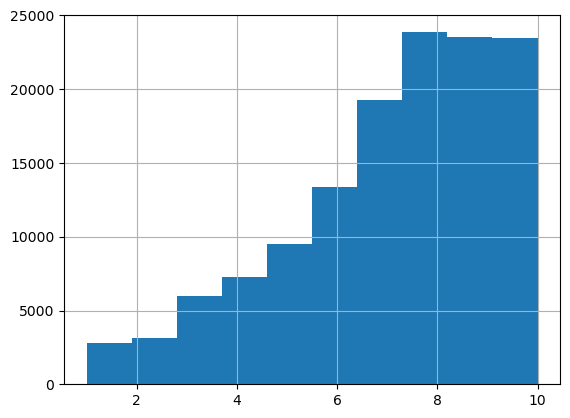

In [89]:
df_combined['rating value'].hist()

In [94]:
df_combined['reaction num'].argmax()

4216

<AxesSubplot:>

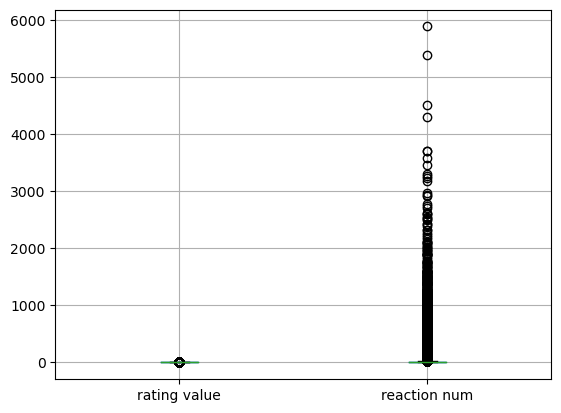

In [92]:
df_combined.boxplot()

In [99]:
print(df_combined['review text'].iloc[4216])

There are two responses I get, without fail, every time I try to get someone new to watch this show.  "I don't like the art style" or "I've seen the dub - NO THANKS."  I'm guilty of both of these myself.  But if there's one thing I need to stress before even getting started on this review, it's that the 4Kids dub is NOT One Piece.  For the love of god, PLEASE do not think it is.  If you've suffered the misfortune of seeing some of the 4Kids episodes, just erase them from your mind and start fresh.  They butchered it, there's really no other way to put it.  They cut episodes, changed the dialogue to fit a MUCH younger and apparently far less intelligent audience (almost insultingly so), gave the characters RIDICULOUS voices, and pretty much watered down the entire series.  FUNimation has done a much better job so far from what I've seen, but regardless, watching it in its original Japanese form with subtitles is really the way to go.

As for the art style, it's true, it's completely dif

In [100]:
df_combined.iloc[4216]

review text       There are two responses I get, without fail, e...
tags                                     [Recommended, Preliminary]
rating value                                                     10
reaction          ['Nice', 'Love it', 'Funny', 'Confusing', 'Inf...
reaction count         ['5539', '153', '32', '116', '5', '37', '3']
reaction num                                                   5885
Name                                                      One Piece
Name: 4216, dtype: object

In [101]:
anime

,Name,Rank,Score,Type,Aired,Members,Link
0,Sousou no Frieren,1,9.33,TV (28 eps),Sep 2023 - Mar 2024,"910,835 members",https://myanimelist.net/anime/52991/Sousou_no_...
1,Bleach: Sennen Kessen-hen - Soukoku-tan,2,9.09,TV (? eps),Oct 2024 -,"115,713 members",https://myanimelist.net/anime/56784/Bleach__Se...
2,Fullmetal Alchemist: Brotherhood,3,9.09,TV (64 eps),Apr 2009 - Jul 2010,"3,422,487 members",https://myanimelist.net/anime/5114/Fullmetal_A...
3,Steins;Gate,4,9.07,TV (24 eps),Apr 2011 - Sep 2011,"2,622,375 members",https://myanimelist.net/anime/9253/Steins_Gate
4,Gintama°,5,9.06,TV (51 eps),Apr 2015 - Mar 2016,"646,103 members",https://myanimelist.net/anime/28977/Gintama°
...,...,...,...,...,...,...,...
9995,Cestvs: The Roman Fighter,9996,5.95,TV (11 eps),Apr 2021 - Jun 2021,"21,084 members",https://myanimelist.net/anime/43763/Cestvs__Th...
9996,Chikkun Takkun,9997,5.95,TV (23 eps),Apr 1984 - Sep 1984,"1,038 members",https://myanimelist.net/anime/16303/Chikkun_Ta...
9997,Choboraunyopomi Gekijou Dai Ni Maku Ai Mai Mii...,9998,5.95,TV (12 eps),Jul 2014 - Sep 2014,"13,255 members",https://myanimelist.net/anime/23551/Choborauny...
9998,Choujin Locke: Shinsekai Sentai,9999,5.95,OVA (2 eps),Aug 1991 - Oct 1991,"1,683 members",https://myanimelist.net/anime/4534/Choujin_Loc...


In [108]:
df_combined.columns

Index(['review text', 'tags', 'rating value', 'reaction', 'reaction count',
       'reaction num', 'Name'],
      dtype='object')